# Exercise sheet 7
**Hello everyone!**

**This exercise sheet is UNGRADED!**

Topics of this exercise sheet are:
* Probabilities
* Law of large numbers
* Central limit theorem

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [ADAM](https://adam.unibas.ch/goto_adam_crs_1266890.html), [Piazza](https://piazza.com/class/kzy15kp8s5t6ku), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids22).

This exercise sheet doesn't need to be submited. However, we encourage you to be extra serious on this sheet since it illustrate very important results.

**Discussion date**: 2022/04/26

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true
from scipy.stats import bernoulli

## Central limit theorem
The central limit theorem is a key results of practical importance for data scientists. In this first part, we will work around this result to better understand it.

### Toss a coin (again)
Let's start with the simplest statistical example, the toss of a coin. We simulate the toss using the generation of a Bernoulli random variable in the library scipy.

In [2]:
toss_coin = bernoulli.rvs(p=0.5,size=100)

Display the empirical distribution (histogram) of the result of this experiment.

(array([46.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 54.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

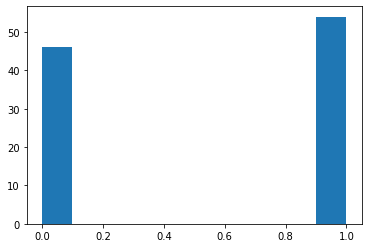

In [6]:
# YOUR CODE HERE
plt.hist(toss_coin)
#raise NotImplementedError()

Reproduce this experiment $N=1000$ times. Store the result in an array *toss_coin_all* of size (1000,100).

In [150]:
N=1000
toss_coin_all = np.zeros((N,100))
for i in range(len(toss_coin_all)):
    toss_coin_all[i] = bernoulli.rvs(p=0.5,size=100)
# raise NotImplementedError()

For each of the $N=1000$ experiment, compute the sum of the obtained values. <br>
Then, display the histogram of this result. Does it look like an empirical Gaussian distribution?

(array([  3.,   8.,  23.,  68.,  95., 187., 160., 162., 123.,  71.,  75.,
         19.,   4.,   0.,   2.]),
 array([35. , 37.2, 39.4, 41.6, 43.8, 46. , 48.2, 50.4, 52.6, 54.8, 57. ,
        59.2, 61.4, 63.6, 65.8, 68. ]),
 <BarContainer object of 15 artists>)

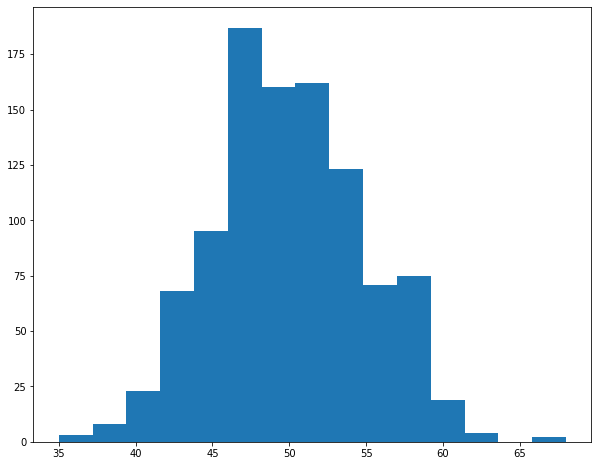

In [151]:
# YOUR CODE HERE
plt.figure(figsize=(10,8))
plt.hist(sum(toss_coin_all.T),bins=15)
# raise NotImplementedError()

Display the continuous density function (cdf) of a Gaussian random variable. You can use the library scipy and the example in this webpage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

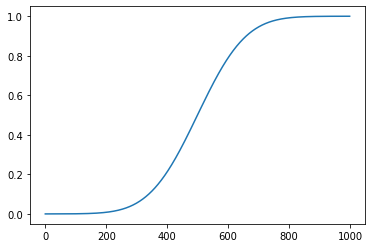

In [152]:
from scipy.stats import norm
# YOUR CODE HERE

x = np.linspace(-4, 4,1000)
plt.plot(norm.cdf(x,0,1))#
#raise NotImplementedError()

Display the empirical distribution of the sum of tossed coins and the cdf of the Gaussian random variable. Use the proper normalization such that the Central Limit Theorem applies.<br>
Don't forget to do a nice plot!

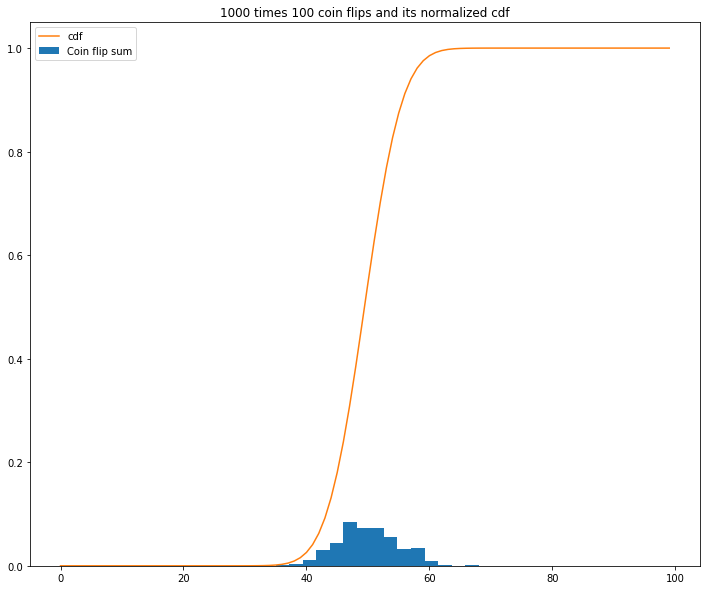

In [154]:
# YOUR CODE HERE+
fig = plt.figure(figsize=(12,10))
plt.hist(sum(toss_coin_all.T),bins=15,density=True)
mu = sum(sum(toss_coin_all.T))/1000
sigma = np.sqrt(sum(np.power(sum(toss_coin_all.T) - mu,2))/1000)
plt.plot(norm.cdf(np.linspace(0, 100, 100),mu,sigma))
plt.title("1000 times 100 coin flips and its normalized cdf")
plt.legend([ "cdf", "Coin flip sum"])
#raise NotImplementedError()

What happen if $N$ is now larger than 1000? Try with different N! (no need to write a nice answer here, just change the value one or two times to see what is happening).

The distribution of the coin tosses is more and more similar to a normal distribution the greater N is

## Law of large numbers (LLN)
The LLN is also a key tool used by all data scientists. This principle is the basis of what is called Monte Carlo simulation. <br>
In this paragraph, we will use this result to estimate the mean of a Poisson random variable.

Using the scipy library, display the density function of the Poisson distribution for $\lambda=5$, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html.

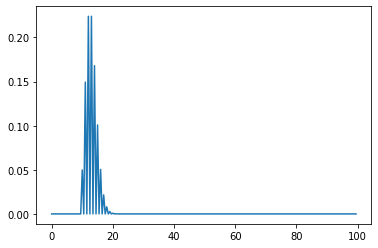

In [158]:
from scipy.stats import poisson
t = np.linspace(-4,4,2)
lam = 3
x = np.arange(0, 100, 0.5)
 
# poisson distribution data for y-axis
y = poisson.pmf(x, mu=lam, loc=10)
# YOUR CODE HERE
plt.plot(x,y)
#raise NotImplementedError()

Generate $N=10000$ independent Poisson random variables and display the empirical mean when using only $1,2,3,...,10000$ realizations. Compare with the true mean.

In [ ]:
N = 10000
# YOUR CODE HERE
raise NotImplementedError()

It is rather hard to see if the empirical mean is close to the true one. Display the absolute error between the emprical and the true mean against the number of sample used. Use a log scale (for the error).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Monte Carlo simulation

Did you notice that the previous plots change every time you run again the cells?
This is because the average mean that we compute is still a random estimation. For some realization it may be close to the true mean, for other it may be far. <br>
To get a clear conclusion, we might want to know what is happening in average, what is the average behaviour of this estimator. <br>
<br>
To do so, we will do a Monte Carlo simulation, i.e. reproduce the previous experiment several times and compute the average error.<br>
Compute and store the absolute error between the average means (using $1,2,3,... 10000$ samples) and the true mean. Reproduce this experiment $M=100$ times, and display the average error. <br>
Hint: for a better display, you can display ony error for $100, 101, ... 10000$ samples.


In [ ]:
M = 100
err_abs = np.zeros((M,N))
# YOUR CODE HERE
raise NotImplementedError()

Notice that the plot is not changing much (as in the begining of the LLN paragraph) every time you run the code. This is (maybe) your first Monte Carlo simulation!

We saw in this notebook that by reproducing a large number of time the same experiment, we are able to estimate information about the observation, such as the distribution of the mean of some quantities. However, in many practical situations, it is impossible to have acces to a very large amount of data. In the following of the course you will see that we can construct confidence interval from the observations. This tool will be key to known either or not we can trust the result obtained with a limited amount of data.

## Bonus: confidence interval (spoiler of next lecture)
A wise man said: "the main difference between good and bad data scientists is that the good ones understand and use confidence intervals in their reports". So let's see if we can have a confidence bound around the previous estimator.

Changing only one line in the previous question, display the average estimation of the mean of the random variables over the $M=100$ Monte Carlo simulation.<br>
Compute also the empirical standard deviation (std) of the observed random variables (you can compute only the std of the $N=10000$ random variables).<br>
Let $(X_{n,m})_{1\leq n \leq N,1\leq m \leq M} \overset{i.i.d.}{\sim} \mathrm{Poisson}(\lambda)$ denote the observed random variables.

Let $\hat\mu_{n,m} = \sum_{i=1}^n X_{i,m}$ denote the empirical mean, and $\hat\sigma_{n,m} = \sqrt{\sum_{i=1}^n (X_{i,m}-\hat\mu_n)^2}$the empirical standard deviation. Finally, we compute: $\hat\mu_n = \frac{1}{M}\sum_{m=1}^M \hat \mu_{n,m}$ the Monte Carlo empirical mean, and $\hat\sigma_n = \frac{1}{M}\sum_{m=1}^M \hat \sigma_{n,m}$ the Monte Carlo empirical standard deviation. The sum over $m$ corresponds to the Monte Carlo averaging.<br>
What happen if you also plot $\hat\mu_n + 3\hat\sigma_n$ and $\hat\mu_n - 3\hat\sigma_n$? 

In [ ]:
M = 100
err_abs = np.zeros((M,N))
std_est = np.zeros(M)
# YOUR CODE HERE
raise NotImplementedError()

The values $\hat\mu_n + 3\hat\sigma_n$ and $\hat\mu_n - 3\hat\sigma_n$ looks like a more an more precise interval around the estimation of the mean.<br>
Display each realization of the Monte Carlo simulation (the $M$ quantities $\hat \mu_{n,m}$).

In [ ]:
M = 100
err_abs = np.zeros((M,N))
std_est = np.zeros(M)
# YOUR CODE HERE
raise NotImplementedError()

What seems to be the property of $\hat\mu_n + 3\hat\sigma_n$ and $\hat\mu_n - 3\hat\sigma_n$? <br>
Mathematical justification will be part of April 26' lecture!